In [1]:
import pandas as pd

df=pd.read_csv("GlobalLandTemperaturesByCountry.csv")
df.columns
print(df.isnull().sum())


df=df.dropna(subset=["dt", "Country"])
df['dt'] = pd.to_datetime(df['dt']) 
df= df.sort_values(by="dt")
print(df.isnull().sum())

df

dt                                   0
AverageTemperature               32651
AverageTemperatureUncertainty    31912
Country                              0
dtype: int64
dt                                   0
AverageTemperature               32651
AverageTemperatureUncertainty    31912
Country                              0
dtype: int64


,dt,AverageTemperature,AverageTemperatureUncertainty,Country
0,1743-11-01,4.384,2.294,Åland
460204,1743-11-01,5.151,2.557,Serbia
289418,1743-11-01,0.936,2.088,Latvia
237217,1743-11-01,5.041,2.374,Hungary
206656,1743-11-01,10.806,2.132,Greece
...,...,...,...,...
176113,2013-09-01,NaN,NaN,Federated States Of Micronesia
505395,2013-09-01,NaN,NaN,Swaziland
174686,2013-09-01,NaN,NaN,Faroe Islands
409790,2013-09-01,NaN,NaN,Paraguay


In [2]:
def fill5(series):
    return series.fillna(
series.rolling(5, center=True, min_periods=1).mean())

df["AverageTemperature"] = df.groupby("Country")["AverageTemperature"].transform(fill5)

df["AverageTemperatureUncertainty"] = df.groupby("Country")["AverageTemperatureUncertainty"].transform(fill5)


df.info()
print(df.head())

<class 'pandas.core.frame.DataFrame'>
Index: 577462 entries, 0 to 577461
Data columns (total 4 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   dt                             577462 non-null  datetime64[ns]
 1   AverageTemperature             548836 non-null  float64       
 2   AverageTemperatureUncertainty  549581 non-null  float64       
 3   Country                        577462 non-null  object        
dtypes: datetime64[ns](1), float64(2), object(1)
memory usage: 22.0+ MB
               dt  AverageTemperature  AverageTemperatureUncertainty  Country
0      1743-11-01               4.384                          2.294    Åland
460204 1743-11-01               5.151                          2.557   Serbia
289418 1743-11-01               0.936                          2.088   Latvia
237217 1743-11-01               5.041                          2.374  Hungary
206656 1743-11-01        

In [3]:
df['Decade'] = (df['dt'].dt.year // 10) * 10
df['Decade'] = df['Decade'].astype(str) + 's'  
print(df.head())

               dt  AverageTemperature  AverageTemperatureUncertainty  Country  \
0      1743-11-01               4.384                          2.294    Åland   
460204 1743-11-01               5.151                          2.557   Serbia   
289418 1743-11-01               0.936                          2.088   Latvia   
237217 1743-11-01               5.041                          2.374  Hungary   
206656 1743-11-01              10.806                          2.132   Greece   

       Decade  
0       1740s  
460204  1740s  
289418  1740s  
237217  1740s  
206656  1740s  


In [4]:
dmean = df.groupby("Decade")["AverageTemperature"].mean().reset_index()
dmean.columns=["Decade", "AverageTemperature"]
dmean

,Decade,AverageTemperature
0,1740s,6.559262
1,1750s,8.494093
2,1760s,8.459645
3,1770s,8.742460
4,1780s,9.069773
5,1790s,10.433826
6,1800s,10.591028
7,1810s,9.843628
8,1820s,13.635772
9,1830s,11.477125


In [5]:
dmean["Decadenum"] = dmean["Decade"].str.replace("s", "").astype(int)
dmean

,Decade,AverageTemperature,Decadenum
0,1740s,6.559262,1740
1,1750s,8.494093,1750
2,1760s,8.459645,1760
3,1770s,8.742460,1770
4,1780s,9.069773,1780
5,1790s,10.433826,1790
6,1800s,10.591028,1800
7,1810s,9.843628,1810
8,1820s,13.635772,1820
9,1830s,11.477125,1830


In [6]:
df["Year"] = df["dt"].dt.year

years_perc = df.groupby("Country")["Year"].nunique()

valid = years_perc[years_perc >= 100].index

df = df[df["Country"].isin(valid)].reset_index(drop=True)
df

,dt,AverageTemperature,AverageTemperatureUncertainty,Country,Decade,Year
0,1743-11-01,4.3840,2.2940,Åland,1740s,1743
1,1743-11-01,5.1510,2.5570,Serbia,1740s,1743
2,1743-11-01,0.9360,2.0880,Latvia,1740s,1743
3,1743-11-01,5.0410,2.3740,Hungary,1740s,1743
4,1743-11-01,10.8060,2.1320,Greece,1740s,1743
...,...,...,...,...,...,...
575117,2013-09-01,27.8050,0.5470,Federated States Of Micronesia,2010s,2013
575118,2013-09-01,16.0670,0.7445,Swaziland,2010s,2013
575119,2013-09-01,11.3845,0.6350,Faroe Islands,2010s,2013
575120,2013-09-01,18.6205,0.3990,Paraguay,2010s,2013


In [7]:
decade_mean = (
df.groupby("Decade")["AverageTemperature"]
.mean()
.reset_index()
)

decade_mean.columns = ["Decade", "Temp_mean"]
print(decade_mean.head())



  Decade  Temp_mean
0  1740s   6.559262
1  1750s   8.494093
2  1760s   8.459645
3  1770s   8.742460
4  1780s   9.069773


In [8]:
global_mean = df["AverageTemperature"].mean()
decade_mean["Anomaly"] = decade_mean["Temp_mean"] - global_mean

decade_mean.head()

,Decade,Temp_mean,Anomaly
0,1740s,6.559262,-10.680153
1,1750s,8.494093,-8.745321
2,1760s,8.459645,-8.779769
3,1770s,8.742460,-8.496955
4,1780s,9.069773,-8.169641


In [9]:
import numpy as np
x = decade_mean["Decade"].str.replace("s", "", regex=False).astype(float).values
y = decade_mean["Temp_mean"].values.astype(float)

a, b = np.polyfit(x, y, 1)


year_target = 2050.0
base_2050 = a * year_target + b

sc1 = base_2050 * 1.005   # +0.5%
sc2 = base_2050 * 1.01    # +1%
sc3 = base_2050 * 0.995   # -0.5%

print("\nBase 2050:", base_2050)
print("Scenario +0.5%:", sc1)
print("Scenario +1%:", sc2)
print("Scenario -0.5%:", sc3)



Base 2050: 24.007976036605243
Scenario +0.5%: 24.128015916788268
Scenario +1%: 24.248055796971297
Scenario -0.5%: 23.887936156422217


In [10]:
corr = df[["AverageTemperature", "AverageTemperatureUncertainty"]].corr()

corr

,AverageTemperature,AverageTemperatureUncertainty
AverageTemperature,1.000000,-0.305812
AverageTemperatureUncertainty,-0.305812,1.000000


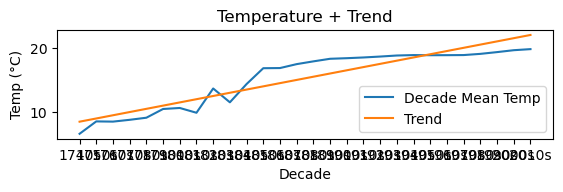

In [11]:
import matplotlib.pyplot as plt
import numpy as np

plt.subplot(3, 1, 1)
plt.plot(decade_mean["Decade"], y, label="Decade Mean Temp")
plt.plot(decade_mean["Decade"], a * x + b,  label="Trend")
plt.xlabel("Decade")
plt.ylabel("Temp (°C)")
plt.title("Temperature + Trend")
plt.legend()

Text(0.5, 1.0, 'Decade Temperature Heatmap')

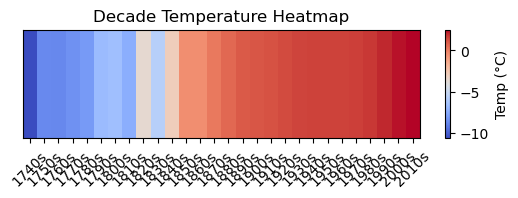

In [12]:
plt.subplot(3, 1, 2)
heat = decade_mean[["Anomaly"]].T
plt.imshow(heat, cmap="coolwarm", aspect="auto")
plt.colorbar(label="Temp (°C)")
plt.yticks([]) 
plt.xticks(range(len(decade_mean)), decade_mean["Decade"], rotation=45)
plt.title("Decade Temperature Heatmap")

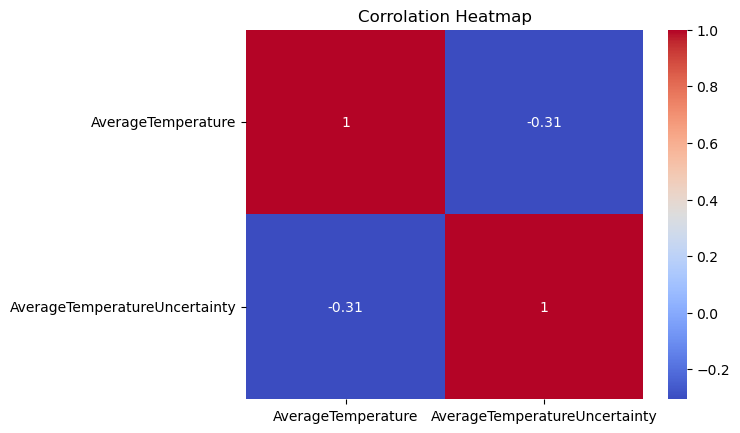

In [13]:
import seaborn as sns
sns.heatmap(corr , annot=True , cmap= "coolwarm")
plt.title("Corrolation Heatmap")
plt.show()